In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp

In [2]:
df = pd.read_excel("33rd_Hob_Tonelle_weekday.xlsx")

In [3]:
path = df.PATH_arrival_Hoboken_weekday
path.dropna(inplace = True)
path.reset_index(inplace = True, drop = True)

In [4]:
lightrail = df.lightrail_departure_Hoboken_weekday
lightrail.dropna(inplace = True)
lightrail.reset_index(inplace = True, drop = True)

In [5]:
def path_time_to_int(time_string):
    if time_string[-2:] == 'AM':
        PM_addition = 0
    else:
        PM_addition = 12 * 60
    split = time_string.split(':')
    return (int(split[0]) % 12) * 60 + int(split[1][0:2]) + PM_addition

In [6]:
def lr_time_to_int(time_string):
    if time_string[-3:-1] == 'AM':
        PM_addition = 0
    else:
        PM_addition = 12 * 60
    split = time_string.split(':')
    return (int(split[0][0:2]) % 12) * 60 + int(split[1][0:2]) + PM_addition

In [7]:
def int_to_time_string(integ):
    hour = integ // 60
    minute = integ % 60
    return str(hour) + ':' + (str(minute) if minute > 9 else '0' + str(minute))

In [8]:
def time_to_next_connect(incoming_path_time):
    if incoming_path_time <= max(lr_ints):
        return min([i for i in lr_ints if i >= incoming_path_time]) - incoming_path_time
    else:
        return min(lr_ints) + 24 * 60 - incoming_path_time

In [9]:
path_ints = path.map(path_time_to_int).sort_values()

In [10]:
lr_ints = lightrail.map(lr_time_to_int).sort_values()

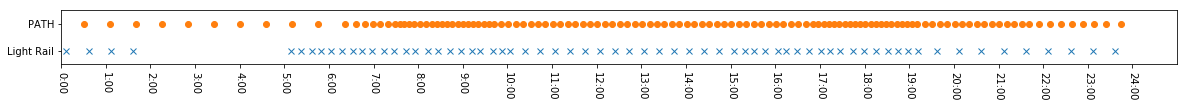

In [11]:
val1 = 0.
val2 = 1.
int_ticks = np.arange(0,1500, 60)
time_ticks = [int_to_time_string(i) for i in int_ticks]
# this is the value where you want the data to appear on the y-axis.
pp.figure(figsize=(20,1))
pp.plot(lr_ints, np.zeros_like(lr_ints) + val1, 'x')
pp.plot(path_ints + 5, np.zeros_like(path_ints) + val2, 'o')
pp.xticks(int_ticks, time_ticks, rotation = -90)
pp.yticks([0, 1], ['Light Rail', 'PATH'])
pp.ylim(val1 - 0.5, val2 + 0.5)
pp.xlim(0, 1500)
pp.show()

In [12]:
wait_times = []
x_labels = []
for i in path_ints + 5:
    wait_times.append(time_to_next_connect(i))
for i in path_ints:
    x_labels.append(int_to_time_string(i))

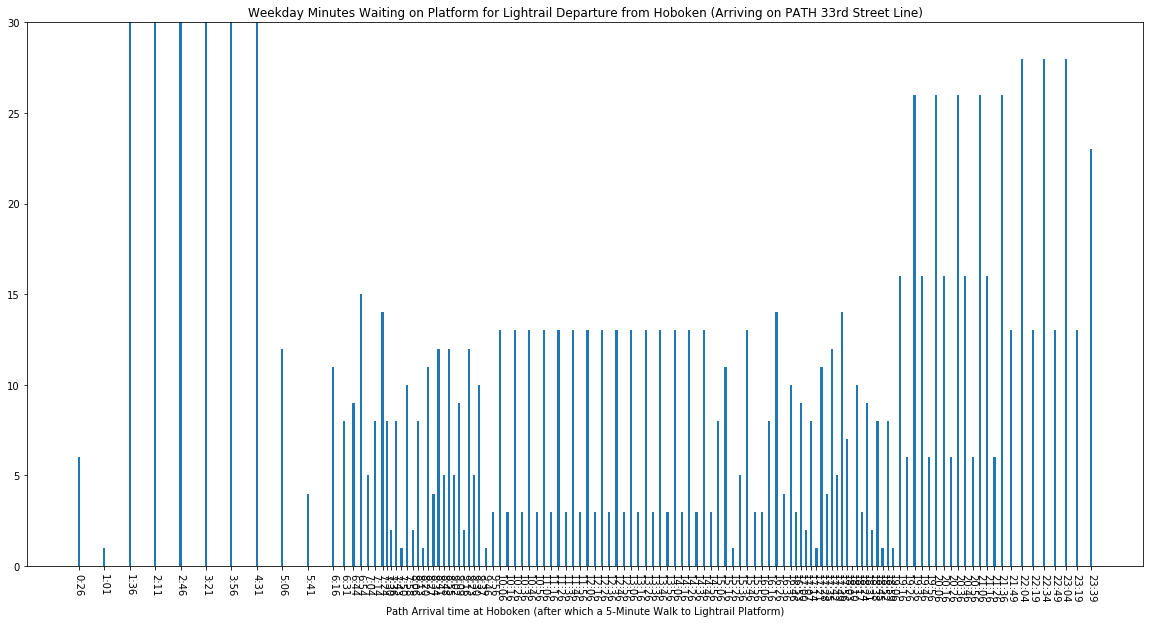

In [13]:
pp.figure(figsize=(20,10))
pp.bar(path_ints, wait_times, width = 3)
pp.xticks(path_ints, x_labels, rotation = -90)
pp.xlabel("Path Arrival time at Hoboken (after which a 5-Minute Walk to Lightrail Platform)")
pp.title("Weekday Minutes Waiting on Platform for Lightrail Departure from Hoboken (Arriving on PATH 33rd Street Line)")
pp.ylim(0, 30)
pp.show()

In [14]:
real_waits = [w for w in wait_times if w < 30]

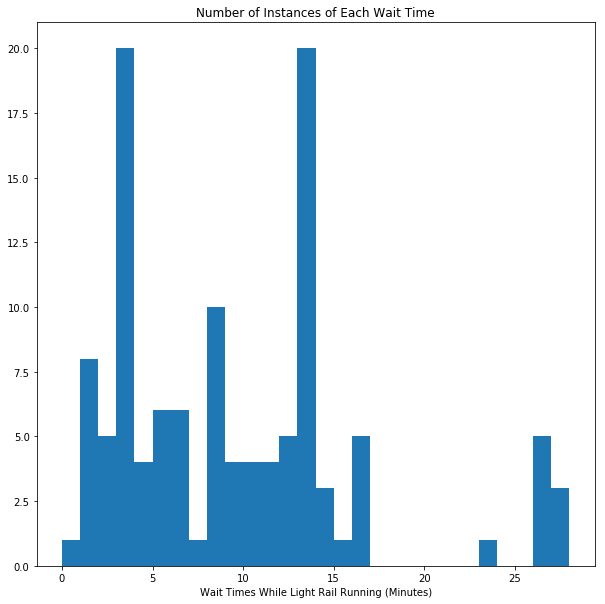

In [15]:
pp.figure(figsize=(10, 10))
pp.hist(real_waits, bins = max(real_waits))
pp.xlabel('Wait Times While Light Rail Running (Minutes)')
pp.title('Number of Instances of Each Wait Time')
pp.show()

In [16]:
std = np.std(real_waits)
std

6.749526561104028

In [17]:
mean = np.mean(real_waits)
mean

9.14655172413793

In [18]:
mean - std

2.397025163033903

In [19]:
mean + std

15.896078285241959

In [20]:
good_waits = [w for w in wait_times if w < 20]

In [21]:
std_good = np.std(good_waits)
std_good

4.718654475710285

In [22]:
mean_good = np.mean(good_waits)
mean_good

7.700934579439252

In [23]:
mean_good - std_good

2.982280103728967

In [24]:
mean_good + std_good

12.419589055149537